# Module Data Visualization: Jupyter Notebook Project

## Summary of Selected Project Topic
<br>

The project topic that was chosen revolves around COVID-19 and GIS application. This topic has affected me in a numerous ways and I was inspired by [this post](https://towardsdatascience.com/visualizing-the-coronavirus-pandemic-with-choropleth-maps-7f30fccaecf5). 

The author illustrated and provided examples of displaying COVID-19 using choropleth maps for the entire world using python plotly, numpy, and pandas. The article has shown that through the use of animated choropleth maps, the spread of the coronavirus can be mapped in a time lapse way. The author downloaded data from Kaggle in a csv format, and creatd both a staic and an animated map. 


## Project Approach and Summary
<br>

This final project is aimed to analyze COVID-19 data for the United States only and provide visualizations. Specifically,
1. a map showing the total confirmed cases in USA,
2. a bar graph showing positive and negative percentages and total number of deaths, and
3. a gridmap showing trends of positive increases since May 1st, 2020. 

This project gathers information from multiple sources. The COVID19 dataset was pulled from a json file from the COVID Tracking Project. Pandas was able to ingest the json file directly. To sort the dataset by the most populated cities in USA, urllib was used to download the 2010 - 2019 US Population csv from Census US. The population csv file uses the State's full name, whereas the COVID19 dataset uses state abbreviation names. In order to join both dataset together, requests and bs4 modelues were deployed to gather a conversion table from 50States.com. 

For analyzing the dataset, pandas and numpy were used. The map (Visualization 1) was created from the plotly module. The bar graph (Visualization 2) was generated using matplotlib. And finally, the gridmap (Visualization 3) was made using seaborn. 

The static map (Visualization 1) shows the latest total confirmed cases in America. By hovering the map, the total cases per each state is shown. As shown, New York State has the most positive cases (> 345,000) and California has approximately 75,000 cases. 

The bar graph (Visualization 2) shows the positive cases, negative cases, and the number of deaths, at top 10 states with the most testings done. The states that have lower than 10% positive cases are Tennessee, California, Texas, and Florida. New Jersey and New York states both have alarming numbers at > 20%. 

Finally, the gripmap (Visualization 3) shows the trends of positive increases in the top 12 most populated cities in the US since May 2020. This gripmap shows hopeful signs of positive increases trending at a negative rate, meaning the positive cases are going down. 




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from matplotlib.ticker import MultipleLocator
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import requests
from bs4 import BeautifulSoup
import seaborn as sns

## Visualization 1 - Static Map ##


# load dataset and find latest COVID-19 results
df = pd.read_json("https://covidtracking.com/api/v1/states/daily.json")
df = df.sort_values(by=["date"], ascending=False)
lastDate = df["date"][0] # last Date of the dataset
df_latest = df.loc[df["date"] == lastDate]

df = df.rename(columns={"dateChecked": "dateLong",
                        "totalTestResults": "Total Cases"})

# initiate plotly Choropleth map and pick US states and positive cases
fig = go.Figure(data=go.Choropleth(
    locations=df_latest['state'],
    locationmode='USA-states',
    z=df_latest['positive'],
    colorscale='darkmint',
    marker_line_color='black',
    marker_line_width=0.5,
    ))
# update geographic features
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
# create title and configure figure size
fig.update_layout(
    title_text='Total Confirmed Cases in USA as of {}'.format(lastDate),
    title_x=0.5,
    geo=dict(projection_type='albers usa'),
    height=500,
    width=700
)

fig.show()

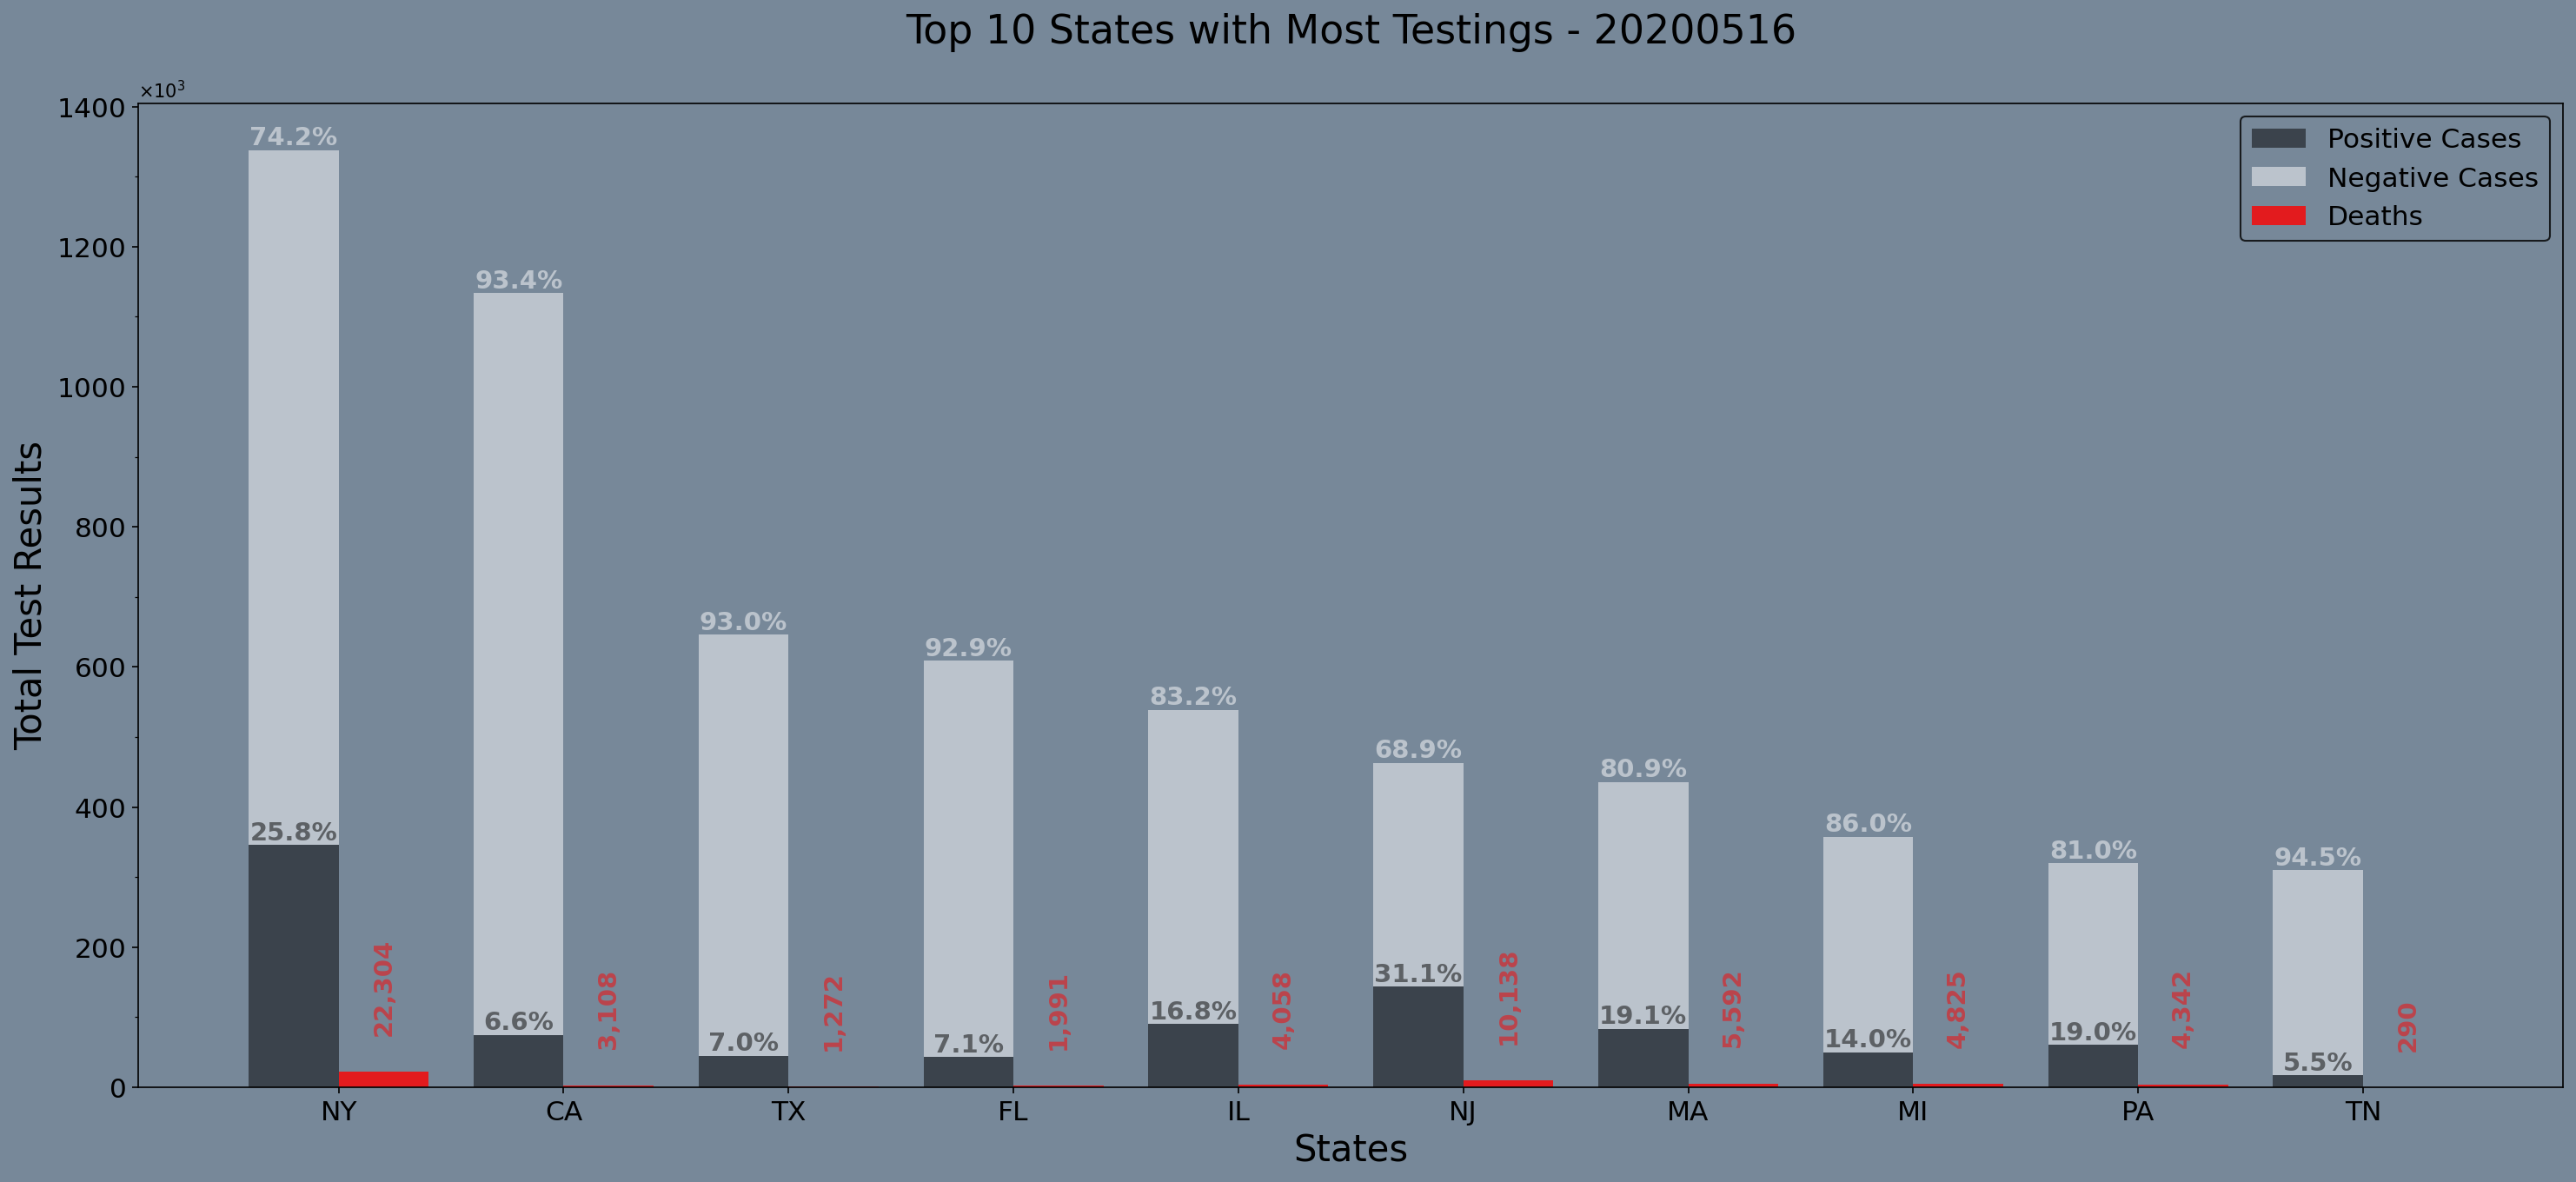

In [2]:
## Visualization 2 -- Bar Graph ##


# sort and find top 10 states
df_latest = df_latest.sort_values(by="totalTestResults", ascending=False)[0:10]

# variables use for matplotlib plotting bar graph
x = np.arange(10)
width = 0.4
x_labels = df_latest["state"].tolist()

# initiate figure
fig, ax = plt.subplots(figsize=(24, 10), dpi=150,
                       facecolor="lightslategray", edgecolor='k')

# bar graphs for positive, negative, and deaths
pos = ax.bar(x-width/2.,
             df_latest["positive"],
             width,
             color="black",
             alpha=0.5,
             label="Positive Cases"
             )

neg = ax.bar(x-width/2.,
             df_latest["negative"],
             width,
             color="white",
             alpha=0.5,
             bottom=df_latest["positive"],
             label="Negative Cases"
             )
death = ax.bar(x+width/2.,
               df_latest["death"],
               width,
               color="red",
               alpha=0.8,
               label="Deaths"
               )

# create function for adding labels on stacked bar
def addValuesStacked(pos, neg):
    for r1, r2 in zip(pos, neg):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2.,
                 h1,
                 "{:.1%}".format(h1/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="black",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2.,
                 h1 + h2,
                 "{:.1%}".format(h2/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="white",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")

# create function for adding labels on regular bar graph
def addValuesBar(bar):
    for rect in bar:
        h3 = rect.get_height()
        ax.annotate('{:,}'.format(int(h3)),
                    xy=(rect.get_x()+rect.get_width()/2., h3),
                    xytext=(0, 20),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    color='red',
                    rotation=90,
                    alpha=0.5,
                    fontsize=14,
                    fontweight="bold"
                    )


# figure refinement and setting labels
ax.set_ylabel('Total Test Results')
ax.set_xlabel('States')
ax.set_title('Top 10 States with Most Testings - {}'.format(lastDate),
             fontsize=22,
             y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
plt.ticklabel_format(style='sci', axis='y', scilimits=(3, 3), useMathText=True)
ax.yaxis.set_minor_locator(MultipleLocator(100000))

# add value labels on bar graphs
addValuesStacked(pos, neg)
addValuesBar(death)

# adjust axes label sizes
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(20)

# colors and yaxis labels
plt.bgcolor = "black"
ax.set_facecolor('lightslategray')
plt.legend(loc="upper right", fontsize=15,
           facecolor="lightslategray", edgecolor="k")


plt.show()

In [3]:
## Visualization 3 - Gridmap


# get population data using URLLIB
URL = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv"
fileName = 'pop10-19.csv'
urlretrieve(URL, fileName)

# create dataframe for population data
df_pop = pd.read_csv(fileName, encoding='latin-1')

# find State population in 2019
df_popSum = df_pop.loc[df_pop["STNAME"] == df_pop["CTYNAME"],["STNAME","POPESTIMATE2019"]]

# find all rows with the same State Name and sum them up
df_popSumTop = df_popSum.groupby("STNAME").agg({"POPESTIMATE2019": "sum"})

# sort the top 12 states to get single index df
df_popSumTop = df_popSumTop.sort_values(by="POPESTIMATE2019",ascending = False)[0:12].reset_index()

# create a list of top populated states in list format
popSumTop_list = df_popSumTop["STNAME"].tolist()


In [4]:
# Table for converting state abbreviations to state name using requests and bs4
url = "https://www.50states.com/abbreviations.htm"

# get url and text information
r = requests.get(url)
content = r.text
soup = BeautifulSoup(content,'html.parser')

# find table name from chrome browser inspector
table = soup.find_all('table',class_="spaced stripedRows abbreviations-table table table-hover")
table = table[0]

USAbb_list = list()
USAbb_dict = dict()

# find all cells within the table and create a list of abbreviations
for row in table.find_all('tr'):
    for cell in row.find_all('td'):
        USAbb_list.append(cell.text)
        
# create a dictionary of abbreviations and full state name
for i in range(len(USAbb_list)):
    if i % 2 == 0:
        USAbb_dict[USAbb_list[i+1]] = USAbb_list[i]
        
# map this dict to df
df['STATENAME'] = df['state'].map(USAbb_dict)

# if state name is in the top populated states, pick those rows 
df_top = df[df["STATENAME"].isin(popSumTop_list)]

df_top = df_top[["date", "state", "positiveIncrease"]]
df_top = df_top.rename(columns={"positiveIncrease": "Positive Increase"})

# manipulating date display
df_top["date"]=df_top["date"].astype(str)
df_top["Time"]= df_top["date"].str[4:6] + "-" + df_top["date"].str[6:]

# month of May
df_top = df_top.loc[df_top["Time"].str[:2] == "05"]
df_top = df_top.sort_values(by="date",ascending=True)

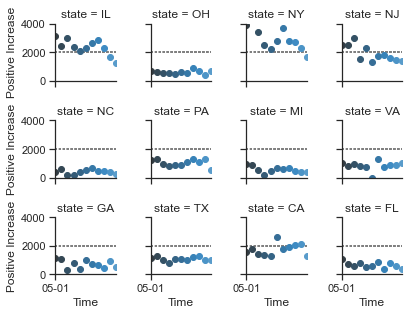

In [5]:
# start plotting with seaborn
sns.set(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df_top, col="state", hue="Time", palette="Blues_d",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=2000, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "Time", "Positive Increase", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(1), yticks=[0, 2000, 4000],
         xlim=(0, 10), ylim=(0,4000))
